In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import time, os
import skopi as sk

In [2]:
%env USE_CUPY=1

env: USE_CUPY=1


In [3]:
# Parameter(s)
num = 1

# Input files
input_dir = '/sdf/home/i/iris/skopi/examples/input'
beamfile=input_dir+'/beam/amo86615.beam'
pdbfile=input_dir+'/pdb/1AON.pdb'

In [4]:
# Load beam
beam = sk.Beam(beamfile)
beam.photon_energy = 1500
increase_factor = 1e2
print('BEFORE: # of photons per pulse = {}'.format(beam.get_photons_per_pulse()))
print('>>> Increasing the number of photons per pulse by a factor {}'.format(increase_factor))
beam.set_photons_per_pulse(increase_factor*beam.get_photons_per_pulse())
print('AFTER: # of photons per pulse = {}'.format(beam.get_photons_per_pulse()))
print('RESET: photon energy = {} eV'.format(beam.photon_energy))

BEFORE: # of photons per pulse = 1000000000000.0
>>> Increasing the number of photons per pulse by a factor 100.0
AFTER: # of photons per pulse = 100000000000000.0
RESET: photon energy = 1500 eV


In [5]:
# Load and initialize the detector
# area pixel detector (pnCCD without detector gap)
det = sk.SimpleSquareDetector(N_pixel=1024, det_size=75e-6*1024, det_distance=0.15, beam=beam)
print('detector distance = {} m'.format(det.distance))

detector distance = 0.15 m


In [6]:
# Create particle object(s)
particle = sk.Particle()
particle.read_pdb(pdbfile, ff='WK')

Unknown element or wrong line: 
 HETATM58696 MG    MG A 550      31.673 -41.439 -20.552  1.00  2.09          MG  

Unknown element or wrong line: 
 HETATM58697 MG    MG B 550      41.491 -82.562 -20.741  1.00 14.16          MG  

Unknown element or wrong line: 
 HETATM58698 MG    MG C 550      79.671-100.240 -20.606  1.00 13.12          MG  

Unknown element or wrong line: 
 HETATM58699 MG    MG D 550     117.347 -81.427 -20.567  1.00  5.13          MG  

Unknown element or wrong line: 
 HETATM58700 MG    MG E 550     126.473 -40.101 -20.547  1.00  9.00          MG  

Unknown element or wrong line: 
 HETATM58701 MG    MG F 550      99.808  -7.496 -20.696  1.00 13.54          MG  

Unknown element or wrong line: 
 HETATM58702 MG    MG G 550      57.636  -8.079 -20.558  1.00 12.78          MG  



In [7]:
tic = time.time()
experiment = sk.SPIExperiment(det=det, beam=beam, particle=particle, n_part_per_shot=num)
experiment.set_orientations(np.array([[1., 0., 0., 0.]]))
img = experiment.generate_image()
toc = time.time()

print("--- %s seconds ---" % (toc-tic))

print("total photons on detector =", np.sum(img))

--- 37.91732311248779 seconds ---
total photons on detector = 815974.0


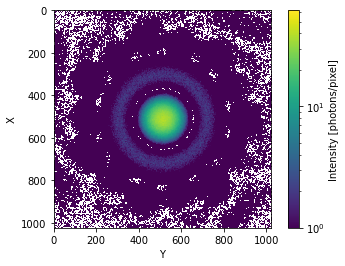

In [8]:
plt.imshow(img, norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label("Intensity [photons/pixel]")
plt.xlabel("Y")
plt.ylabel("X")
plt.show()

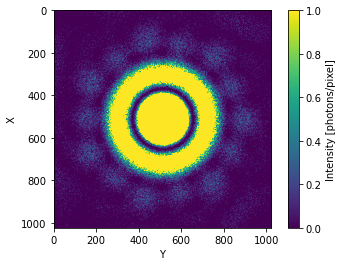

In [9]:
plt.imshow(img, vmax=1)
cbar = plt.colorbar()
cbar.set_label("Intensity [photons/pixel]")
plt.xlabel("Y")
plt.ylabel("X")
plt.show()